In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets import load_digits

In [3]:
df = load_digits()

In [4]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
df.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
df.target[0]

0

In [8]:
df.target_names[0]

0

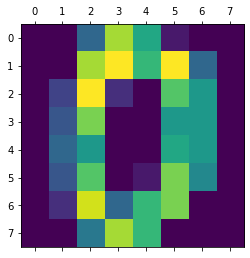

In [9]:
plt.matshow(df.images[0])

<Figure size 432x288 with 0 Axes>

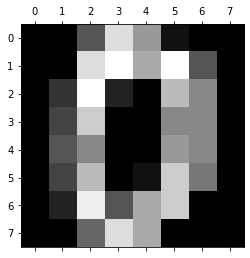

In [10]:
plt.gray()
plt.matshow(df.images[0])

In [11]:
len(df.data)

1797

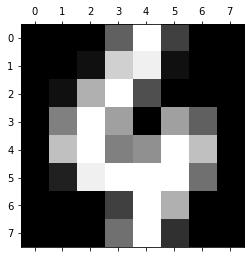

In [12]:
plt.matshow(df.images[64])

In [13]:
df.target[64]

4

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2)

In [17]:
len(x_train)

1437

In [18]:
len(x_test)

360

In [26]:
reg = LogisticRegression(solver='lbfgs', max_iter=100000)

In [27]:
reg.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

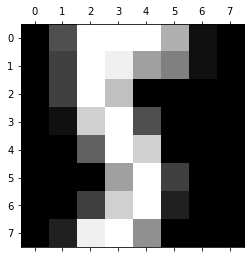

In [30]:
plt.matshow(df.images[162])

In [31]:
df.target[162]

5

In [33]:
reg.predict([df.data[162]])

array([5])

In [34]:
reg.score(x_test, y_test)

0.9666666666666667

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
y_pred = reg.predict(x_test)

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 40,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 39,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 34]], dtype=int64)

Text(69.0, 0.5, 'Actual')

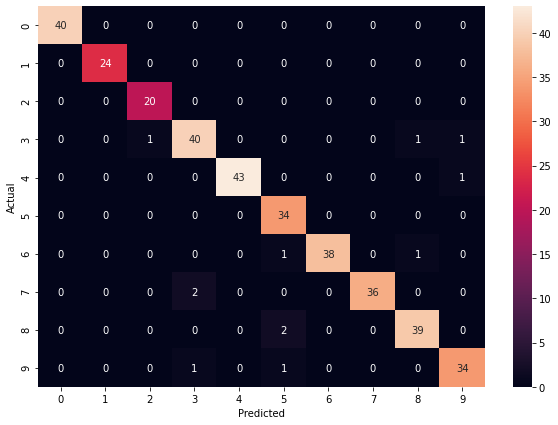

In [39]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

For any column the value means how many times the Y axis value is predicted as the X axis value.
Eg.1 for col (0,0): 0 is predicted as 0 40 times
Eg.2 for col (7,3): 7 is predicted as 3 2 times